## Simon's Algorithm Implementation 
Unity ID: smanthe \
Name: Sai Krishna Teja Varma Manthena

In [1]:
# Adapted from a qiskit notebook
# from qiskit import Aer, QuantumCircuit, execute
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, QuantumCircuit, execute, BasicAer
from qiskit.tools.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere

In [2]:
def dotprod(a, b):
    temp_sum = 0
    for i in range(len(a)):
        temp_sum += int(a[i])*int(b[i])
    return temp_sum%2

def oracle(circ, b):
    # TODO generalize this function
    for i, char in enumerate(b):
        circ.cx(i, i+len(b))
    
    m = len(b) - b.rfind('1') - 1
    for pos,bit in enumerate(reversed(b)):
        if bit == '1':
            circ.cx(m,pos+len(b))

In [3]:
# Main function
b = '10101'
n = len(b)
circ = QuantumCircuit(n*2, n)

circ.h(range(n))
circ.barrier()
oracle(circ, b)
circ.barrier()
circ.h(range(n))

circ.measure(range(n), range(n))
print(circ)

     ┌───┐ ░                                          ░ ┌───┐┌─┐            
q_0: ┤ H ├─░───■────────────────────────■────■────■───░─┤ H ├┤M├────────────
     ├───┤ ░   │                        │    │    │   ░ ├───┤└╥┘┌─┐         
q_1: ┤ H ├─░───┼────■───────────────────┼────┼────┼───░─┤ H ├─╫─┤M├─────────
     ├───┤ ░   │    │                   │    │    │   ░ ├───┤ ║ └╥┘┌─┐      
q_2: ┤ H ├─░───┼────┼────■──────────────┼────┼────┼───░─┤ H ├─╫──╫─┤M├──────
     ├───┤ ░   │    │    │              │    │    │   ░ ├───┤ ║  ║ └╥┘┌─┐   
q_3: ┤ H ├─░───┼────┼────┼────■─────────┼────┼────┼───░─┤ H ├─╫──╫──╫─┤M├───
     ├───┤ ░   │    │    │    │         │    │    │   ░ ├───┤ ║  ║  ║ └╥┘┌─┐
q_4: ┤ H ├─░───┼────┼────┼────┼────■────┼────┼────┼───░─┤ H ├─╫──╫──╫──╫─┤M├
     └───┘ ░ ┌─┴─┐  │    │    │    │  ┌─┴─┐  │    │   ░ └───┘ ║  ║  ║  ║ └╥┘
q_5: ──────░─┤ X ├──┼────┼────┼────┼──┤ X ├──┼────┼───░───────╫──╫──╫──╫──╫─
           ░ └───┘┌─┴─┐  │    │    │  └───┘  │    │   ░       ║  ║  ║  ║  ║ 

In [4]:
backend = Aer.get_backend('qasm_simulator')
shots = 1024
job = execute(circ, backend=backend, shots=shots)
results = job.result()
counts = results.get_counts()

for code in counts:
    print("(" + str(b) + " dot " + str(code) + ")%2 = " + str(dotprod(b, code)))

(10101 dot 10011)%2 = 0
(10101 dot 11100)%2 = 0
(10101 dot 00010)%2 = 0
(10101 dot 01111)%2 = 0
(10101 dot 11001)%2 = 0
(10101 dot 10001)%2 = 0
(10101 dot 01101)%2 = 0
(10101 dot 10100)%2 = 0
(10101 dot 00111)%2 = 0
(10101 dot 01000)%2 = 0
(10101 dot 01010)%2 = 0
(10101 dot 11011)%2 = 0
(10101 dot 00000)%2 = 0
(10101 dot 10110)%2 = 0
(10101 dot 11110)%2 = 0
(10101 dot 00101)%2 = 0


In [5]:
#Aer SImulator
backend = BasicAer.get_backend('statevector_simulator')
job = execute(circ, backend) 
result = job.result()
print(result.get_statevector())

[0.  +0.0000000e+00j 0.  +0.0000000e+00j 0.25-4.5924255e-17j ...
 0.  +0.0000000e+00j 0.  +0.0000000e+00j 0.  +0.0000000e+00j]


In [6]:
print(result.get_counts())

{'00010': 1}


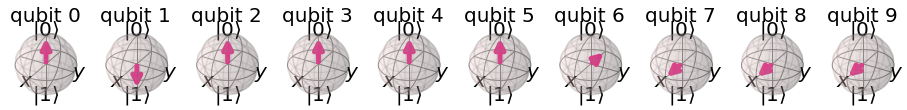

In [7]:
plot_bloch_multivector(result.get_statevector())

In [8]:
backend = Aer.get_backend('aer_simulator')
job = execute(circ, backend, shots=1)  # shots default = 1024
result = job.result()
counts = results.get_counts()

for code in counts:
    print("(" + str(b) + " dot " + str(code) + ")%2 = " + str(dotprod(b, code)))

(10101 dot 10011)%2 = 0
(10101 dot 11100)%2 = 0
(10101 dot 00010)%2 = 0
(10101 dot 01111)%2 = 0
(10101 dot 11001)%2 = 0
(10101 dot 10001)%2 = 0
(10101 dot 01101)%2 = 0
(10101 dot 10100)%2 = 0
(10101 dot 00111)%2 = 0
(10101 dot 01000)%2 = 0
(10101 dot 01010)%2 = 0
(10101 dot 11011)%2 = 0
(10101 dot 00000)%2 = 0
(10101 dot 10110)%2 = 0
(10101 dot 11110)%2 = 0
(10101 dot 00101)%2 = 0
